### **Anomaly Detection in Server Logs**
 **Goal:** Use machine learning to identify anomalous server behavior using structured log data
 (e.g., CPU usage, request rate, status codes).

**Install Required Libraries**

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

**Simulate Server Log Data**

For demo purposes, we’ll create synthetic logs. In real-world use, you’d parse from log files
 (e.g., Apache, NGINX, CloudWatch).

In [2]:
import pandas as pd
import numpy as np

# Reproducibility
np.random.seed(42)

# Simulate timestamps (1-minute intervals for 1000 minutes)
timestamps = pd.date_range(start='2023-01-01', periods=1000, freq='T')

# Generate normal behavior
cpu_usage = np.random.normal(loc=30, scale=5, size=1000)
request_rate = np.random.normal(loc=120, scale=15, size=1000)
error_rate = np.random.normal(loc=1, scale=0.5, size=1000)

# Inject anomalies in the last 20 entries
cpu_usage[-20:] += np.random.normal(50, 5, 20)
request_rate[-20:] += np.random.normal(300, 20, 20)
error_rate[-20:] += np.random.normal(10, 2, 20)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'cpu': cpu_usage,
    'requests': request_rate,
    'errors': error_rate
})

/tmp/ipython-input-2-1287535579.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start='2023-01-01', periods=1000, freq='T')


**Visualize the Server Metrics**

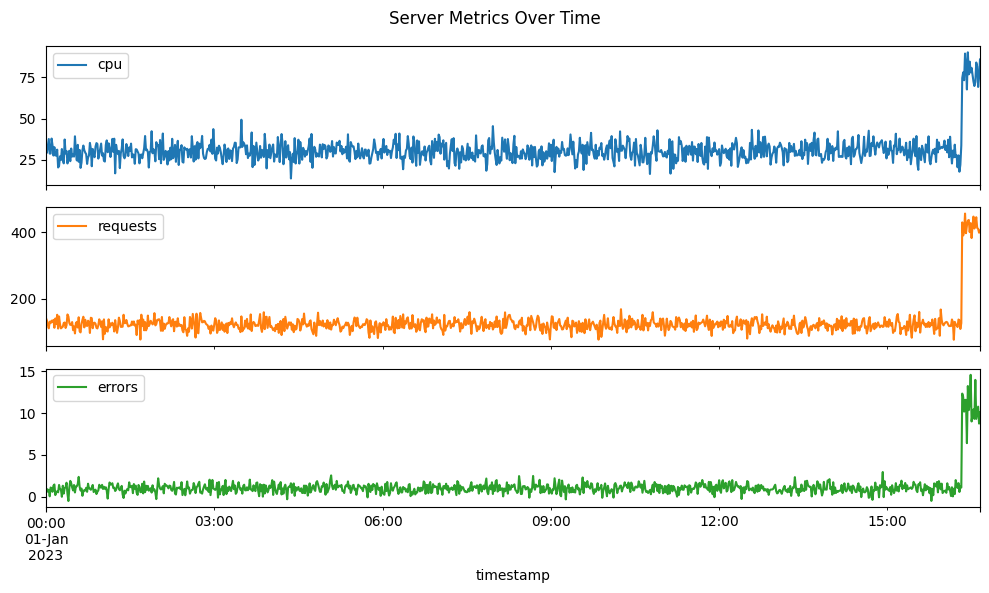

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot CPU, request, and error rate over time
df.set_index('timestamp')[['cpu', 'requests', 'errors']].plot(subplots=True, figsize=(10, 6), title='Server Metrics Over Time')
plt.tight_layout()
plt.show()

**Apply Isolation Forest for Anomaly Detection**

In [4]:
from sklearn.ensemble import IsolationForest

# Use only numerical features
X = df[['cpu', 'requests', 'errors']]

# Fit Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
model.fit(X)

# Predict anomalies
df['anomaly_score'] = model.decision_function(X)
df['anomaly'] = model.predict(X)  # 1 = normal, -1 = anomaly

# Convert to binary: 1 = anomaly, 0 = normal
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

**Visualize Anomalies Over Time (CPU)**

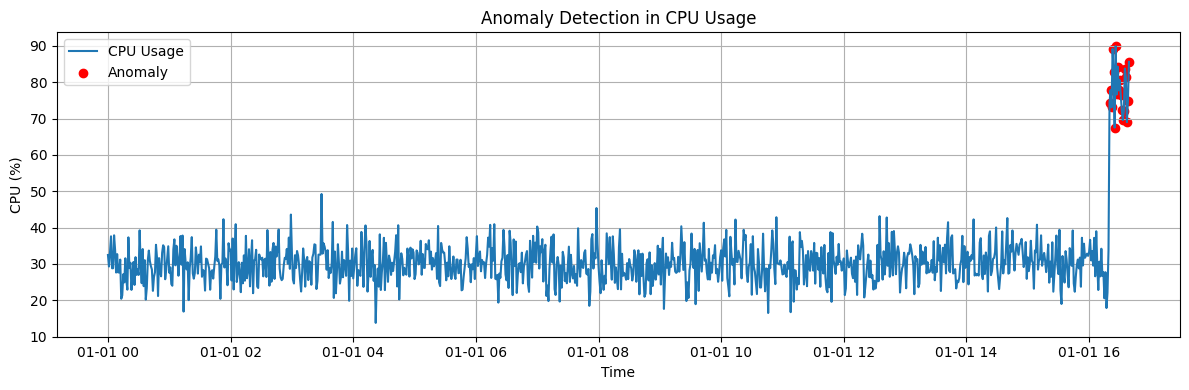

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(df['timestamp'], df['cpu'], label='CPU Usage')
plt.scatter(
    df[df['anomaly'] == 1]['timestamp'],
    df[df['anomaly'] == 1]['cpu'],
    color='red',
    label='Anomaly'
)
plt.title("Anomaly Detection in CPU Usage")
plt.xlabel("Time")
plt.ylabel("CPU (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary of Detected Anomalies**

In [6]:
print("🔎 Detected Anomalies:")
print(df[df['anomaly'] == 1][['timestamp', 'cpu', 'requests', 'errors']])

🔎 Detected Anomalies:
              timestamp        cpu    requests     errors
980 2023-01-01 16:20:00  74.389963  429.430384  12.352442
981 2023-01-01 16:21:00  77.825363  390.042500  11.950123
982 2023-01-01 16:22:00  73.097092  402.370709  10.193184
983 2023-01-01 16:23:00  89.199882  456.013917  11.592795
984 2023-01-01 16:24:00  82.764753  396.902042  11.601776
985 2023-01-01 16:25:00  67.530769  419.925866   6.420094
986 2023-01-01 16:26:00  89.947173  434.684915  13.256794
987 2023-01-01 16:27:00  76.650292  436.727049  10.374177
988 2023-01-01 16:28:00  84.308634  400.181642  11.285878
989 2023-01-01 16:29:00  77.778806  427.167658  14.600332
990 2023-01-01 16:30:00  80.573733  382.239596   9.014850
991 2023-01-01 16:31:00  76.420309  418.149402   9.882177
992 2023-01-01 16:32:00  72.328295  446.903875  10.458921
993 2023-01-01 16:33:00  69.604488  410.978677   9.326388
994 2023-01-01 16:34:00  72.073903  426.451408  13.993914
995 2023-01-01 16:35:00  83.786393  444.989704   9

### **Summary**
**In this project,** we used Isolation Forest to detect anomalies in simulated server log data. We generated normal and abnormal server behavior using CPU usage, request rate, and error rate. The model learned the normal patterns and flagged 20 unusual entries where the server showed signs of overload or failure. This shows how machine learning can help automatically monitor and detect issues in server systems.